# NLP using Tensorflow.
### WWCode CONNECT REIMAGINE 2021

* Autor : Victoria Ubaldo @vikyale

# Tokenizing text and creating sequences for sentences

## Import libraries

In [ ]:
# Import libraries
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


## Write some sentences

Feel free to change and add sentences as you like

In [ ]:
sentences = [
    'My favority drink is coffee',
    'My favorite food is mochi',
    'do you like mochi too?',
    "your favorite flavor of mochi is chocolate"
]

## Tokenize the words


In [ ]:
# Optionally set the max number of words to tokenize.
# The out of vocabulary (OOV) token represents words that are not in the index.
# Call fit_on_text() on the tokenizer to generate unique numbers for each word

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

## View the word index

In [ ]:
# Examine the word index
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'is': 2, 'mochi': 3, 'my': 4, 'favorite': 5, 'favority': 6, 'drink': 7, 'coffee': 8, 'food': 9, 'do': 10, 'you': 11, 'like': 12, 'too': 13, 'your': 14, 'flavor': 15, 'of': 16, 'chocolate': 17}


In [ ]:
# Get the number for a given word
print(word_index['mochi'])

3


# Create sequences for the sentences

After you tokenize the words, the word index contains a unique number for each word. However, the numbers in the word index are not ordered. Words in a sentence have an order. So after tokenizing the words, the next step is to generate sequences for the sentences.

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
print (sequences)

[[4, 6, 7, 2, 8], [4, 5, 9, 2, 3], [10, 11, 12, 3, 13], [14, 5, 15, 16, 3, 2, 17]]


# Sequence sentences that contain words that are not in the word index

Let's take a look at what happens if the sentence being sequenced contains words that are not in the word index.

The Out of Vocabluary (OOV) token is the first entry in the word index. You will see it shows up in the sequences in place of any word that is not in the word index.

In [ ]:
sentences2 = ["I like hot chocolate", "My dogs and my hedgehog like kibble but my squirrel prefers grapes and my chickens like ice cream, preferably vanilla"]

sequences2 = tokenizer.texts_to_sequences(sentences2)
print(sequences2)

[[1, 12, 1, 17], [4, 1, 1, 4, 1, 12, 1, 1, 4, 1, 1, 1, 1, 4, 1, 12, 1, 1, 1, 1]]


## Make the sequences all the same length¶


In [ ]:
padded = pad_sequences(sequences)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'is': 2, 'mochi': 3, 'my': 4, 'favorite': 5, 'favority': 6, 'drink': 7, 'coffee': 8, 'food': 9, 'do': 10, 'you': 11, 'like': 12, 'too': 13, 'your': 14, 'flavor': 15, 'of': 16, 'chocolate': 17}

Sequences =  [[4, 6, 7, 2, 8], [4, 5, 9, 2, 3], [10, 11, 12, 3, 13], [14, 5, 15, 16, 3, 2, 17]]

Padded Sequences:
[[ 0  0  4  6  7  2  8]
 [ 0  0  4  5  9  2  3]
 [ 0  0 10 11 12  3 13]
 [14  5 15 16  3  2 17]]


In [ ]:
# Specify a max length for the padded sequences
padded = pad_sequences(sequences, maxlen=15)
print(padded)

[[ 0  0  0  0  0  0  0  0  0  0  4  6  7  2  8]
 [ 0  0  0  0  0  0  0  0  0  0  4  5  9  2  3]
 [ 0  0  0  0  0  0  0  0  0  0 10 11 12  3 13]
 [ 0  0  0  0  0  0  0  0 14  5 15 16  3  2 17]]


In [ ]:
# Put the padding at the end of the sequences
padded = pad_sequences(sequences, maxlen=15, padding="post")
print(padded)

[[ 4  6  7  2  8  0  0  0  0  0  0  0  0  0  0]
 [ 4  5  9  2  3  0  0  0  0  0  0  0  0  0  0]
 [10 11 12  3 13  0  0  0  0  0  0  0  0  0  0]
 [14  5 15 16  3  2 17  0  0  0  0  0  0  0  0]]


In [ ]:
# Limit the length of the sequences, you will see some sequences get truncated
padded = pad_sequences(sequences, maxlen=3)
print(padded)

[[ 7  2  8]
 [ 9  2  3]
 [12  3 13]
 [ 3  2 17]]


In [ ]:
# Try turning sentences that contain words that 
# aren't in the word index into sequences.
# Add your own sentences to the test_data
test_data = [
    "my best friend's favorite ice cream flavor is strawberry",
    "my dog's best friend is a manatee"
]
print (test_data)

# Remind ourselves which number corresponds to the
# out of vocabulary token in the word index
print("<OOV> has the number", word_index['<OOV>'], "in the word index.")

# Convert the test sentences to sequences
test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

# Pad the new sequences
padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")

# Notice that "1" appears in the sequence wherever there's a word 
# that's not in the word index
print(padded)

["my best friend's favorite ice cream flavor is strawberry", "my dog's best friend is a manatee"]
<OOV> has the number 1 in the word index.

Test Sequence =  [[4, 1, 1, 5, 1, 1, 15, 2, 1], [4, 1, 1, 1, 2, 1, 1]]

Padded Test Sequence: 
[[ 0  4  1  1  5  1  1 15  2  1]
 [ 0  0  0  4  1  1  1  2  1  1]]


## Recognize Sentiment in Text

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Dataset

In [ ]:
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2021-06-10 17:12:22--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 172.217.204.113, 172.217.204.139, 172.217.204.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hc61m1ihfgpjf6ldhckgjknuqe6qknlh/1623345075000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2021-06-10 17:12:23--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hc61m1ihfgpjf6ldhckgjknuqe6qknlh/1623345075000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|1

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')



In [ ]:
#Explore dataset
dataset.head(5)

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [ ]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
len(training_sentences)

1593

In [ ]:
len(testing_sentences)

399

In [ ]:
training_sentences[:3]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case Excellent value.',
 'Great for the jawbone.']

## Tokenize the dataset

In [ ]:
# Tokenize the dataset, including padding and OOV

vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

##Create token for every word in the corpus, only in training sentences!
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index


In [ ]:
print(word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'i': 4, 'it': 5, 'a': 6, 'is': 7, 'to': 8, 'this': 9, 'was': 10, 'of': 11, 'my': 12, 'for': 13, 'not': 14, 'phone': 15, 'in': 16, 'very': 17, 'with': 18, 'great': 19, 'good': 20, 'on': 21, 'that': 22, 'have': 23, 'you': 24, 'had': 25, 'so': 26, 'but': 27, 'are': 28, 'food': 29, 'service': 30, 'be': 31, 'as': 32, 'place': 33, 'all': 34, 'like': 35, 'quality': 36, 'time': 37, 'product': 38, 'one': 39, 'at': 40, 'we': 41, 'well': 42, 'they': 43, 'would': 44, 'back': 45, 'if': 46, 'headset': 47, 'works': 48, 'battery': 49, 'really': 50, "don't": 51, 'sound': 52, 'your': 53, 'use': 54, 'best': 55, 'up': 56, 'from': 57, 'has': 58, 'just': 59, 'an': 60, "i've": 61, 'will': 62, 'no': 63, 'were': 64, 'only': 65, 'also': 66, 'me': 67, 'there': 68, 'ever': 69, 'than': 70, "it's": 71, 'out': 72, 'nice': 73, 'ear': 74, 'go': 75, 'excellent': 76, 'when': 77, 'first': 78, 'work': 79, 'recommend': 80, '2': 81, 'here': 82, 'after': 83, "i'm": 84, 'or': 85, 'never': 86, 

In [ ]:
##Sequences of tokens and pad them to the same lenght with this code
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)


In [ ]:
padded[2]

array([ 19,  13,   2, 613,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
#1593 sequences
#100 tokens
print(padded.shape)

(1593, 100)


In [ ]:
print(sequences[2])

[19, 13, 2, 613]


In [ ]:
# Review a Sequence
# Let's quickly take a look at one of the padded sequences to ensure everything above worked appropriately.

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


## Train a Basic Sentiment Model with Embeddings

In [ ]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), ##with the directions of the words
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 9606      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
50/50 [==============================] - 1s 6ms/step - loss: 0.6928 - accuracy: 0.5217 - val_loss: 0.7007 - val_accuracy: 0.4110
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5229 - val_loss: 0.6952 - val_accuracy: 0.4110
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.5348 - val_loss: 0.6980 - val_accuracy: 0.4160
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.5851 - val_loss: 0.6800 - val_accuracy: 0.4862
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.6685 - val_loss: 0.6540 - val_accuracy: 0.5965
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.7677 - val_loss: 0.6240 - val_accuracy: 0.6516
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.9121 - val_loss: 0.5177 - val_accuracy: 0.7669
Epoch 8/10
50/50 [==

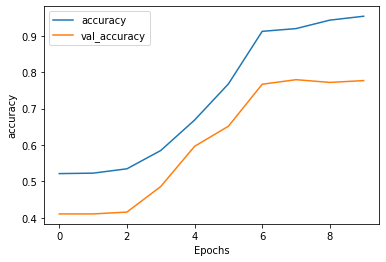

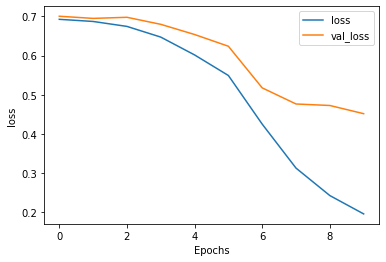

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Get files for visualizing the network
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

# Predicting Sentiment in New Reviews


In [ ]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.96821225]


I hate spaghetti
[0.15188074]


Everything was cold
[0.41559014]


Everything was hot exactly as I wanted
[0.62261957]


Everything was green
[0.51872015]


the host seated us immediately
[0.68939114]


they gave us free chocolate cake
[0.680923]


not sure about the wilted flowers on the table
[0.04175729]


only works when I stand on tippy toes
[0.86422455]


does not work when I stand on my head
[0.01852885]


